In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
train = pd.read_excel('Data/train.xlsx')
test = pd.read_excel('Data/test.xlsx')

In [3]:
train.head()

,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,hh_children,...,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
0,926,91,1961-11-23,1,28.0,1,4,6,10,0,...,0,0.0,0,0.000000,0.000000,1,0.000000,0,0,5
1,747,57,1961-10-24,1,23.0,1,3,5,8,0,...,0,0.0,1,4.804611,4.804611,0,0.000000,0,1,3
2,1190,115,1961-10-05,1,22.0,1,3,5,9,0,...,0,0.0,0,8.007685,8.007685,1,0.000000,0,0,5
3,1065,97,1961-09-23,1,27.0,1,2,4,10,2,...,0,0.0,0,0.000000,0.000000,1,1.249199,0,0,0
4,806,42,1961-09-12,0,59.0,0,4,6,10,4,...,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,3


In [4]:
train.shape

(1143, 75)

In [5]:
test.shape

(286, 75)

# COMBINING BOTH DATASETS

In [6]:
data = pd.concat([train,test])

In [7]:
data.shape

(1429, 75)

In [8]:
data.shape[0]

1429

In [9]:
data['surveyid'].is_unique

True

# Data Cleaning

In [10]:
def checkmissing(df):
    null_cols = {}
    for i in data.columns:
        null_sum = data[i].isnull().sum()
        null_percentage = (null_sum/data.shape[0]) * 100
        if null_percentage > 0:
            null_cols[i] = null_percentage
    missing = pd.Series(data = null_cols)
    return missing

In [11]:
series=checkmissing(data)
series

age                         0.069979
hh_totalmembers            29.671099
cons_alcohol                3.848845
cons_tobacco                1.889433
cons_med_children          37.018894
fs_chskipm_often           36.738978
fs_chwholed_often          36.738978
fs_meat                    29.671099
fs_enoughtom               29.671099
fs_sleephun                29.671099
med_expenses_hh_ep         60.811756
med_expenses_sp_ep         77.396781
med_expenses_child_ep      52.414276
med_portion_sickinjured    29.671099
med_port_sick_child        36.738978
med_afford_port            37.368789
med_sickdays_hhave         29.671099
med_healthconsult          37.368789
med_u5_deaths              95.031491
ed_expenses                40.447866
ed_expenses_perkid         40.447866
ed_schoolattend            40.447866
ed_sch_missedpc            40.797761
ed_work_act_pc             50.174948
depressed                  19.734080
dtype: float64

In [12]:
data.drop(series[series > 50].index,axis=1,inplace=True)
data.shape

(1429, 70)

In [13]:
# dropping columns that are not relevant
data.drop(['surveyid','village','survey_date','day_of_week'],axis=1,inplace=True)
data.shape

(1429, 66)

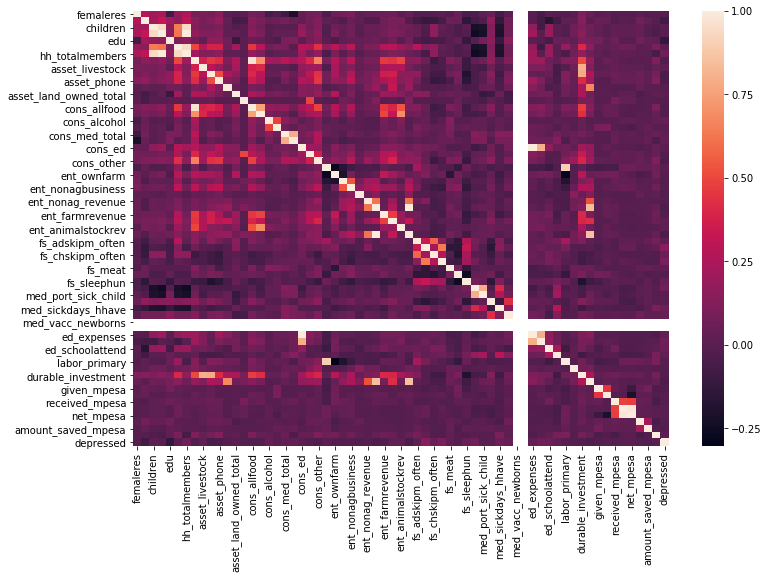

In [14]:
#Checking for correlation in the dataset
corr_matrix = data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix)


In [15]:
def correlation(df,threshhold):
    corr_col = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshhold:
                colname = corr_matrix.columns[i]
                corr_col.add(colname)
    return corr_col

corr_cols = correlation(data,0.7)
corr_cols

{'cons_allfood',
 'cons_med_children',
 'cons_ownfood',
 'durable_investment',
 'ed_expenses',
 'ed_expenses_perkid',
 'ent_total_cost',
 'hh_totalmembers',
 'hhsize',
 'labor_primary',
 'med_port_sick_child',
 'net_mpesa',
 'nondurable_investment'}

In [16]:
data.drop(corr_cols,axis=1,inplace = True)
data.shape

(1429, 53)

In [17]:
#converting columns with categorical data to categorical datatype
cat = ['femaleres','married','asset_niceroof','ent_wagelabor','ent_ownfarm','ent_business','ent_nonagbusiness',
      'early_survey','fs_enoughtom','fs_sleephun','depressed']
for i in cat:
     data[i]=data[i].astype('category')


In [18]:
data['age'].replace(to_replace = '.d',value = np.nan,inplace = True )

In [19]:
#data.info()

In [20]:
data[cat].isnull().sum()

femaleres              0
married                0
asset_niceroof         0
ent_wagelabor          0
ent_ownfarm            0
ent_business           0
ent_nonagbusiness      0
early_survey           0
fs_enoughtom         424
fs_sleephun          424
depressed            282
dtype: int64

In [21]:
#data[['fs_enoughtom','fs_sleephun','depressed']].fillna(method = 'ffill',inplace = True)

In [22]:
for i in cat:
    data[i].fillna(method = 'ffill',inplace = True)
    if data[i].isnull().any():
        data[i].fillna(method = 'bfill',inplace = True)
    
for j in data.columns:
    if j not in cat:
        data[j].fillna(data[j].mean(),inplace = True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1429 entries, 0 to 285
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   femaleres                1429 non-null   category
 1   age                      1429 non-null   float64 
 2   married                  1429 non-null   category
 3   children                 1429 non-null   int64   
 4   edu                      1429 non-null   int64   
 5   hh_children              1429 non-null   int64   
 6   cons_nondurable          1429 non-null   float64 
 7   asset_livestock          1429 non-null   float64 
 8   asset_durable            1429 non-null   float64 
 9   asset_phone              1429 non-null   float64 
 10  asset_savings            1429 non-null   float64 
 11  asset_land_owned_total   1429 non-null   float64 
 12  asset_niceroof           1429 non-null   category
 13  cons_alcohol             1429 non-null   float64 
 14  cons_toba

In [24]:
data.describe()

,age,children,edu,hh_children,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,...,med_child_check,ed_schoolattend,ed_sch_missedpc,wage_expenditures,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,saved_mpesa,amount_saved_mpesa
count,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,...,1429.0,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000
mean,34.783111,2.883135,8.687194,2.041288,126.105799,112.970888,144.797796,18.902193,10.165535,0.911025,...,1.0,0.703054,1.337025,20.741777,0.013296,0.475194,0.070679,4.080613,0.188943,2.114914
std,13.982613,1.874472,2.923532,2.044081,137.591884,237.350489,191.952725,27.552131,75.140134,1.598780,...,0.0,0.261502,1.992989,716.126179,0.114579,5.857223,0.256377,28.574333,0.391601,18.174208
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,2.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.200001,3.000000,9.000000,2.000000,107.120900,16.521257,118.513740,0.000000,0.000000,0.000000,...,1.0,0.703054,1.337025,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42.000000,4.000000,10.000000,3.000000,186.465440,101.891500,219.410570,32.030739,0.000000,1.500000,...,1.0,0.857143,1.337025,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,91.000000,11.000000,19.000000,10.000000,1431.609100,2754.531700,3720.370400,192.184430,2242.151900,27.000000,...,1.0,1.500000,30.000000,27000.000000,1.000000,160.153700,1.000000,448.430360,1.000000,488.468780


# DATA PREPROCESSING

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OneHotEncoder,LabelBinarizer,StandardScaler
X = data.drop('depressed',axis = 1)
y = data['depressed']



In [26]:
x_filter = VarianceThreshold(threshold = 0.05)
x_filtered = x_filter.fit(X)
x_filtered

VarianceThreshold(threshold=0.05)

In [27]:
x_filtered.get_support().sum()

48

In [28]:
cons = [not var for var in x_filtered.get_support() ]
x_var = X.columns[cons]
x_var

Index(['asset_niceroof', 'med_vacc_newborns', 'med_child_check',
       'given_mpesa'],
      dtype='object')

In [29]:
X.drop(x_var,axis = 1,inplace = True)

In [30]:
X.shape

(1429, 48)

In [31]:
from sklearn.ensemble import RandomForestClassifier
labels = X.columns
rfc = RandomForestClassifier(n_estimators=10000,random_state=0,n_jobs=-1)
rfc.fit(X, y)
importances = rfc.feature_importances_ 
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,labels[f],importances[indices[f]]))

 1) femaleres                      0.138788
 2) age                            0.083104
 3) married                        0.072117
 4) children                       0.035378
 5) edu                            0.034891
 6) hh_children                    0.032905
 7) cons_nondurable                0.032254
 8) asset_livestock                0.032050
 9) asset_durable                  0.030540
10) asset_phone                    0.030411
11) asset_savings                  0.029196
12) asset_land_owned_total         0.024675
13) cons_alcohol                   0.022504
14) cons_tobacco                   0.021477
15) cons_med_total                 0.019955
16) cons_ed                        0.019915
17) cons_social                    0.019907
18) cons_other                     0.018338
19) ent_wagelabor                  0.017305
20) ent_ownfarm                    0.016611
21) ent_business                   0.016433
22) ent_nonagbusiness              0.016387
23) ent_employees               

In [35]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


In [116]:
sfs = SFS(RandomForestClassifier(n_estimators = 100,n_jobs= -1,random_state = 3),
         k_features = 12,
         forward = True,
         floating = False,
         verbose = 2,
         scoring = 'roc_auc',
         cv = 4,
         n_jobs = -1).fit(X,y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   22.9s finished

[2020-03-15 03:10:49] Features: 1/12 -- score: 0.5502424819300105[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:   23.1s finished

[2020-03-15 03:11:12] Features: 2/12 -- score: 0.5641833647069461[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:   22.9s finished

[2020-03-15 03:11:35] Features: 3/12 -- score: 0.5682391403521783[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done  45 out o

In [117]:
useful_features = sfs.k_feature_names_
useful_features

('femaleres',
 'edu',
 'hh_children',
 'asset_savings',
 'cons_tobacco',
 'cons_med_total',
 'ent_wagelabor',
 'ent_employees',
 'fs_enoughtom',
 'amount_given_mpesa',
 'received_mpesa',
 'amount_received_mpesa')

In [43]:

X_train,x_test,Y_train,y_test = train_test_split(X[list(useful_features)],y,test_size = 0.3 ,random_state = 3)

In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 472 to 130
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   femaleres              1000 non-null   category
 1   edu                    1000 non-null   int64   
 2   hh_children            1000 non-null   int64   
 3   asset_savings          1000 non-null   float64 
 4   cons_tobacco           1000 non-null   float64 
 5   cons_med_total         1000 non-null   float64 
 6   ent_wagelabor          1000 non-null   category
 7   ent_employees          1000 non-null   int64   
 8   fs_enoughtom           1000 non-null   category
 9   amount_given_mpesa     1000 non-null   float64 
 10  received_mpesa         1000 non-null   int64   
 11  amount_received_mpesa  1000 non-null   float64 
dtypes: category(3), float64(5), int64(4)
memory usage: 81.3 KB


In [45]:

ohe = OneHotEncoder(categories = 'auto',handle_unknown = 'ignore')

In [46]:
X_train_ohe = ohe.fit_transform(X_train).toarray()
X_test_ohe= ohe.transform(x_test).toarray()

In [50]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train_ohe)
x_test_std = sc.transform(X_test_ohe)

# MACHINE LEARNING

In [51]:
from sklearn.model_selection import StratifiedKFold,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,classification_report,recall_score,precision_score

/home/lion/.local/lib/python3.6/site-packages/dask/dataframe/utils.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [52]:
rs = 3
kfold = StratifiedKFold(n_splits = 5,shuffle = True ,random_state = rs)
classifiers = []
classifiers.append(('LR',LogisticRegression(solver = 'lbfgs',random_state = rs)))
classifiers.append(('KNN',KNeighborsClassifier()))
classifiers.append(('SVM',SVC(gamma = 'auto',random_state = rs)))
classifiers.append(('NB',GaussianNB()))
classifiers.append(('XGB',XGBClassifier(seed=rs)))



for name, model in classifiers:
    cv_results = cross_val_score(model,X_train_std,Y_train,cv = kfold,scoring = 'accuracy')
    print (name,'   ',cv_results.mean())
    
    
    

LR     0.6169999999999999
KNN     0.607
SVM     0.6450000000000001
NB     0.379
XGB     0.6059999999999999


In [53]:
# rs = 3
kfold1 = StratifiedKFold(n_splits = 5,shuffle = True ,random_state = rs)
c_values = [0.1,1,10]
#gamma_values= [0.1,1,10]
kernel_values = ['linear','rbf']
param = dict(C = c_values,kernel = kernel_values)
grid = GridSearchCV(estimator = SVC(gamma = 'auto',random_state = rs),param_grid = param,cv = kfold1)
grid_result = grid.fit(X_train_std,Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.663000 using {'C': 0.1, 'kernel': 'rbf'}


In [54]:
svm = SVC(C = 0.1,kernel = 'linear',gamma = 'auto',class_weight='balanced')

In [55]:
svm.fit(X_train_std,Y_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [57]:
y_pred = svm.predict(x_test_std)

In [58]:
acc = accuracy_score(y_test, y_pred)

In [59]:
acc

0.585081585081585

In [60]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[192,  98],
       [ 80,  59]])

In [63]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.5432646985859588

In [64]:
recall_score(y_test,y_pred)

0.4244604316546763

In [65]:
precision_score(y_test,y_pred)

0.37579617834394907

In [66]:
log = LogisticRegression()

In [67]:
log.fit(X_train_std,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
y_logpred = log.predict(x_test_std)

In [70]:
accuracy_score(y_test,y_logpred)

0.6456876456876457

In [71]:
y_test.value_counts()

0.0    290
1.0    139
Name: depressed, dtype: int64

In [73]:
confusion = confusion_matrix(y_test,y_logpred)
confusion

array([[251,  39],
       [113,  26]])

In [75]:
#sensitivity
recall_score(y_test,y_logpred)

0.18705035971223022

In [76]:
#precision
precision_score(y_test,y_logpred)

0.4

In [79]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_logpred)

0.5262838005457703

In [108]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_std,Y_train)


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [110]:
xgb_pred = xgb.predict(x_test_std)
accuracy_score(y_test,xgb_pred)

0.6526806526806527

In [111]:
confusion_matrix(y_test,xgb_pred)

array([[250,  40],
       [109,  30]])

In [112]:
recall_score(y_test,xgb_pred)

0.2158273381294964

In [113]:
precision_score(y_test,xgb_pred)

0.42857142857142855

In [114]:
roc_auc_score(y_test,xgb_pred)

0.5389481518233689

In [88]:
import joblib

In [89]:
joblib.dump(ohe,'ohe1.joblib')

['ohe1.joblib']

In [90]:
joblib.dump(sc,'sc1.joblib')

['sc1.joblib']

In [91]:
joblib.dump(log,'log.joblib')

['log.joblib']

In [118]:
joblib.dump(svm,'svm.joblib')

['svm.joblib']

In [119]:
joblib.dump(xgb,'xgb.joblib')

['xgb.joblib']